In [145]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame, datetime
from datetime import datetime, timedelta, time
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm, skew 
from sklearn.model_selection import train_test_split

pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [146]:
train=pd.read_csv('/Users/mirabooboo/Desktop/Kaggle/train.csv')
test=pd.read_csv('/Users/mirabooboo/Desktop/Kaggle/test.csv')

In [147]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [148]:
#num = [col for col in train.columns.values if train[col].dtype != 'object']
num

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

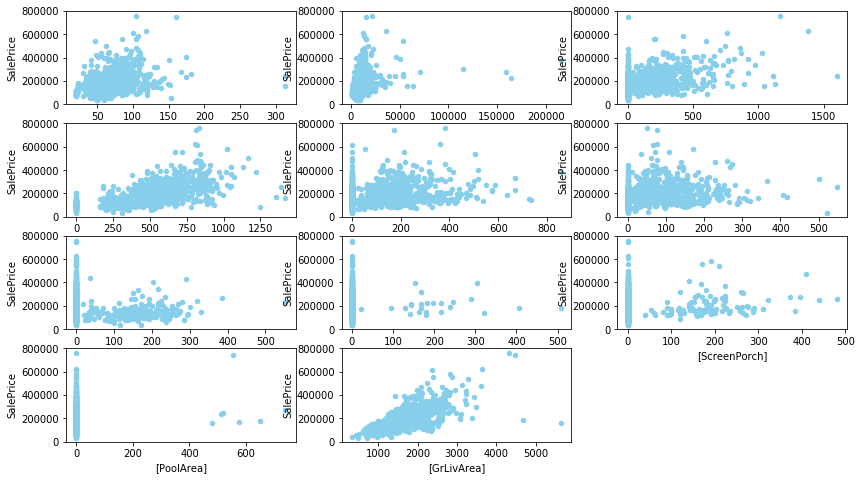

In [149]:
plt.figure(figsize=(14,10))
variable=['LotFrontage','LotArea','MasVnrArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch', '3SsnPorch','ScreenPorch','PoolArea','GrLivArea']
plot_number=1
for i in variable :
    ax=plt.subplot(5,3,plot_number)
    train.plot.scatter(x=[i],y='SalePrice',  color='skyblue', ylim=(0,800000),ax=ax)
    plot_number=plot_number +1 
plt.show()

In [150]:
train = train[train.GrLivArea < 4000]
train= train[train.MasVnrArea<1500]

[10, 14, 0, 180]

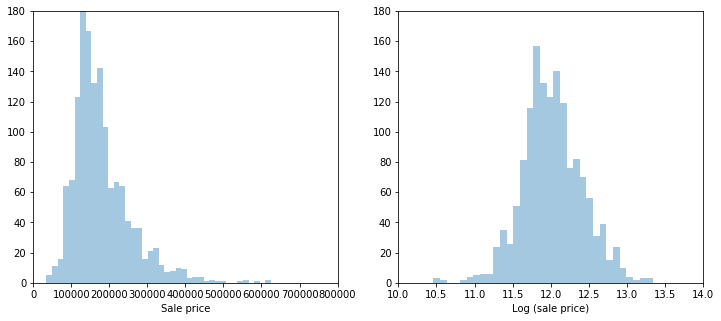

In [151]:
# Set up the matplotlib figure
plt.figure(figsize=(12,5))
#f, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
plt.subplot(121)
sns.distplot(train['SalePrice'],kde=False)
plt.xlabel('Sale price')
plt.axis([0,800000,0,180])
plt.subplot(122)
sns.distplot(np.log(train['SalePrice']),kde=False)
plt.xlabel('Log (sale price)')
plt.axis([10,14,0,180])

In [152]:
train.SalePrice1 = np.log1p(train.SalePrice)
y = train.SalePrice1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [153]:
#combine train and test for feature engineering 
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

              Missing_Ratio
PoolQC            99.724708
MiscFeature       96.386786
Alley             93.255334
Fence             80.385409
FireplaceQu       48.726772
LotFrontage       16.655196
GarageFinish       5.471438
GarageYrBlt        5.471438
GarageQual         5.471438
GarageCond         5.471438
GarageType         5.402615
BsmtExposure       2.821748
BsmtCond           2.821748
BsmtQual           2.787337
BsmtFinType2       2.752925
BsmtFinType1       2.718513
MasVnrType         0.550585
MasVnrArea         0.516173
MSZoning           0.137646
BsmtFullBath       0.068823


/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


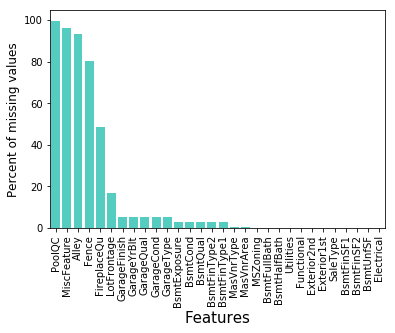

In [154]:
# check missing value 
result=all_data.isnull().sum()/len(all_data)*100
result=result.drop(result[result == 0].index).sort_values(ascending=False)[:30]
missing= pd.DataFrame({'Missing_Ratio' :result})
m=missing.head(20)
print(m)

#Visualize missing value percentage 
fig,ax = plt.subplots()
plt.xticks(rotation='90')
sns.barplot(x=result.index, y=result, color='turquoise')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=12)
plt.show()

In [155]:
all_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2906.000000,2422.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2891.000000,2905.000000,2905.000000,2905.000000,2905.000000,2906.000000,2906.000000,2906.000000,2906.000000,2904.000000,2904.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2747.000000,2905.000000,2905.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000
mean,57.159326,69.118084,10128.762216,6.080179,5.567103,1971.187199,1984.188919,100.881010,437.175904,49.804131,560.616179,1047.596213,1156.190296,334.463180,4.715416,1495.368892,0.428375,0.061295,1.565038,0.378527,2.859601,1.044391,6.444942,0.594632,1978.005825,1.764200,471.878830,93.620096,47.148314,23.132829,2.613902,16.066070,1.905712,51.053338,6.213008,2007.793531
std,42.574124,22.717963,7805.596174,1.402766,1.114050,30.288221,20.902209,175.279975,442.504624,169.551324,439.859644,427.470894,383.202771,425.913091,46.499457,491.205279,0.524003,0.245588,0.551077,0.502531,0.822388,0.214190,1.562435,0.643376,25.579716,0.761839,214.677743,126.495709,67.049218,64.286977,25.243863,56.199189,33.071540,568.660158,2.710669,1.316141
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7473.000000,5.000000,5.000000,1953.000000,1965.000000,0.000000,0.000000,0.000000,220.000000,792.000000,876.000000,0.000000,0.000000,1124.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9450.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.000000,0.000000,467.000000,988.000000,1081.500000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,478.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11546.250000,7.000000,6.000000,2000.000000,2004.000000,164.000000,732.000000,0.000000,803.000000,1300.000000,1383.000000,702.750000,0.000000,1740.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,4010.000000,1526.000000,2336.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [156]:
# categorical data
for col in ('PoolQC','MiscFeature','Alley','FireplaceQu','Fence','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','MasVnrType'):
    all_data[col] = all_data[col].fillna('None')

# numerical data
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath','MasVnrArea'):
    all_data[col] = all_data[col].fillna(0)    
    
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.mean()))    

In [157]:
# check missing value 
all_data.isnull().sum().sort_values(ascending=False)[:15]

MSZoning         4
Functional       2
Utilities        2
Exterior1st      1
SaleType         1
Electrical       1
Exterior2nd      1
KitchenQual      1
ExterCond        0
MasVnrType       0
MasVnrArea       0
ExterQual        0
SaleCondition    0
Foundation       0
BsmtQual         0
dtype: int64

In [158]:
all_data['Utilities'].value_counts()

AllPub    2903
NoSeWa       1
Name: Utilities, dtype: int64

In [159]:
all_data = all_data.drop(['Utilities'], axis=1)

In [160]:
all_no_missing = all_data.dropna()
check=all_no_missing.isnull().sum()
missing = check[check > 0]
print(missing.sum())

0


In [161]:
# save all categorical columns in list
categorical_var = [col for col in all_no_missing.columns.values if all_no_missing[col].dtype == 'object']

# dataframe with categorical features
data_cat = all_no_missing[categorical_var]
# dataframe with numerical features
data_num = all_no_missing.drop(categorical_var, axis=1)

In [162]:
print(data_cat.shape)
print(data_num.shape)

(2897, 42)
(2897, 36)


In [163]:
all_data_cat = pd.get_dummies(data_cat)

In [164]:
skewness = data_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.75]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index
data_num[skewed_features] = np.log1p(data_num[skewed_features])

22 skewed numerical features to log transform


In [172]:
final_data = pd.concat([data_num, all_data_cat], axis = 1)
print("New number of features : " + str(final_data.shape[1]))

train = final_data[:train.shape[0]]
test = final_data[train.shape[0]:]

# Partition the dataset in train + validation sets
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.2, random_state =44)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

New number of features : 299
X_train : (1157, 299)
X_test : (290, 299)
y_train : (1157,)
y_test : (290,)


In [173]:
X_train.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_0,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_0,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_0,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_0,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_0,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,G

In [177]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score, train_test_split

In [175]:
# Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

In [178]:
# 1* Linear Regression without Regularization
lr = LinearRegression()
lr.fit(X_train, y_train)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

RMSE on Training set : 0.251489015478
RMSE on Test set : 0.281135554436
